In [41]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [42]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ИЗУЧЕНИЕ ДАННЫХ

train_images.shape

(60000, 28, 28)

In [44]:
len(train_labels)

60000

In [45]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [46]:
test_images.shape

(10000, 28, 28)

In [47]:
len(test_labels)

10000

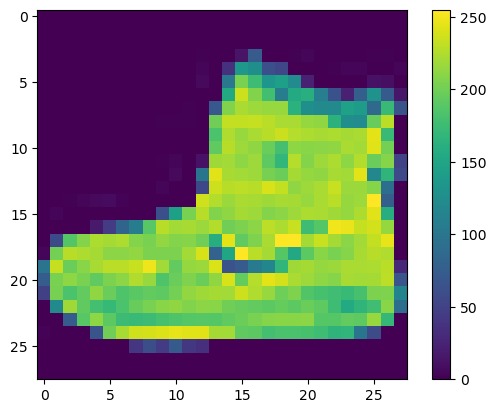

In [48]:
# ПОДГОТОВКА ДАННЫХ

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

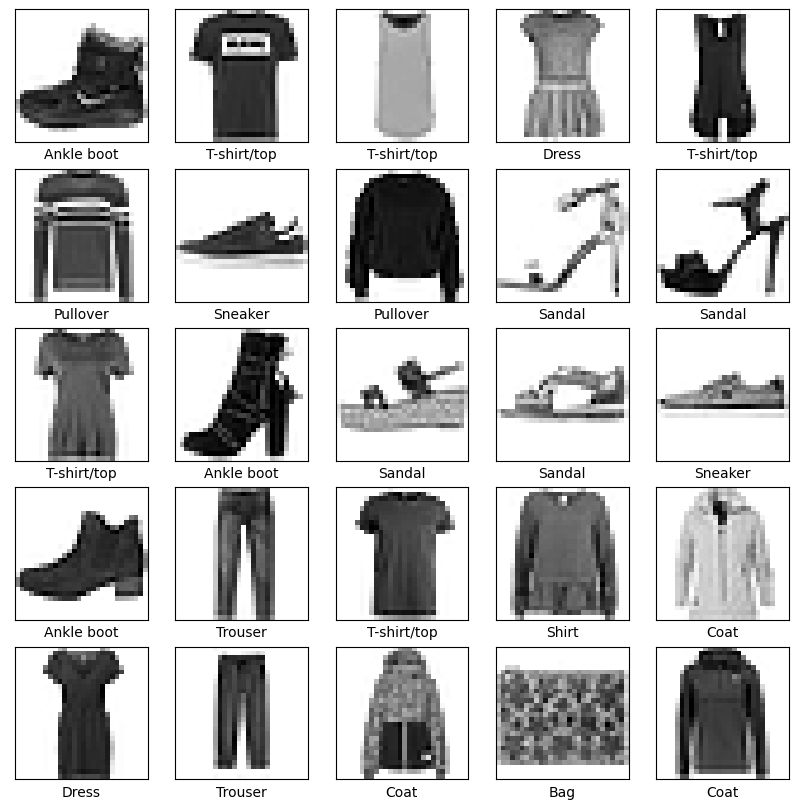

In [49]:
train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [50]:
# ПОСТРОЕНИЕ МОДЕЛИ

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])


# КОМПИЛЯЦИЯ МОДЕЛИ
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# ВЫДЕЛЕНИЕ ПРОВЕРОЧНОГО НАБОРА
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# ОБУЧЕНИЕ МОДЕЛИ
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20


2023-06-02 09:12:35.792181: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.


98/98 [==============================] - 2s 11ms/step - loss: 0.7430 - accuracy: 0.7554 - val_loss: 0.5105 - val_accuracy: 0.8255
Epoch 2/20
98/98 [==============================] - 1s 7ms/step - loss: 0.4759 - accuracy: 0.8367 - val_loss: 0.4482 - val_accuracy: 0.8472
Epoch 3/20
98/98 [==============================] - 1s 7ms/step - loss: 0.4238 - accuracy: 0.8546 - val_loss: 0.4106 - val_accuracy: 0.8568
Epoch 4/20
98/98 [==============================] - 1s 8ms/step - loss: 0.4005 - accuracy: 0.8615 - val_loss: 0.3930 - val_accuracy: 0.8612
Epoch 5/20
98/98 [==============================] - 1s 8ms/step - loss: 0.3755 - accuracy: 0.8691 - val_loss: 0.3894 - val_accuracy: 0.8587
Epoch 6/20
98/98 [==============================] - 1s 8ms/step - loss: 0.3648 - accuracy: 0.8718 - val_loss: 0.3697 - val_accuracy: 0.8689
Epoch 7/20
98/98 [==============================] - 1s 9ms/step - loss: 0.3498 - accuracy: 0.8769 - val_loss: 0.3579 - val_accuracy: 0.8731
Epoch 8/20
98/98 [============

In [51]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

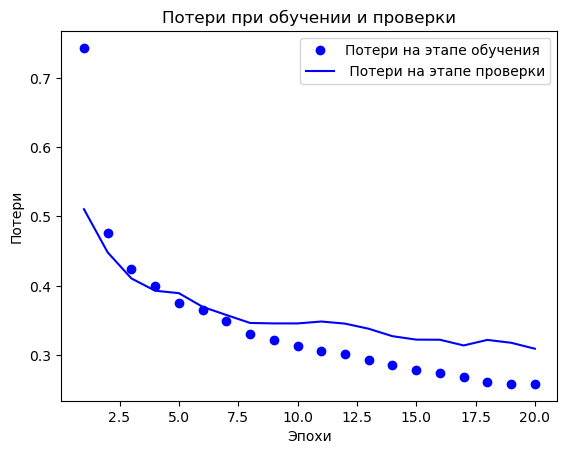

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Потери на этапе обучения')
plt.plot(epochs, val_loss, 'b', label=' Потери на этапе проверки')
plt.title('Потери при обучении и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()


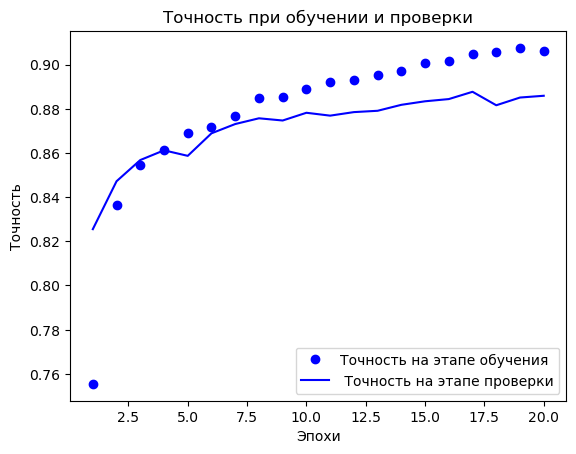

In [53]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Точность на этапе обучения')
plt.plot(epochs, val_acc, 'b', label=' Точность на этапе проверки')
plt.title('Точность при обучении и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()


In [54]:
#  ОЦЕНКА ТОЧНОСТИ МОДЕЛИ 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nТочность на проверочных данных:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 0.8777

Точность на проверочных данных: 0.8776999711990356


In [55]:
# ИСПОЛЬЗОВАНИЕ МОДЕЛИ ДЛЯ ПРЕДСКАЗАНИЙ

predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([3.59784167e-06, 9.47652836e-08, 1.29415575e-05, 1.54555721e-06,
       1.95488665e-05, 1.20042395e-02, 1.35242490e-05, 3.60543318e-02,
       3.65289015e-04, 9.51524913e-01], dtype=float32)

In [56]:
np.argmax(predictions[0])


9

In [57]:
test_labels[0]

9

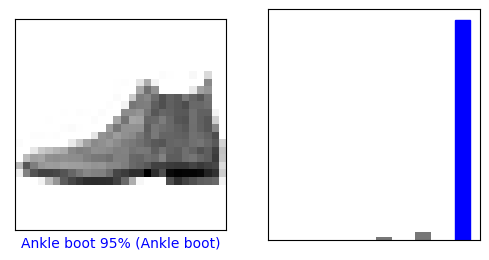

In [58]:
# График изображений 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

# Диаграмма вероятностей классов
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()



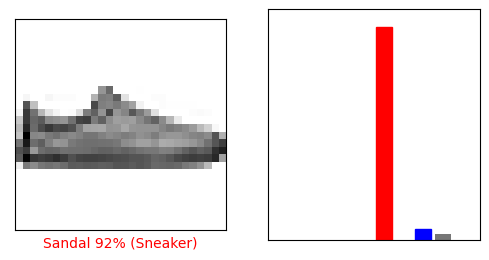

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,test_labels)
plt.show()


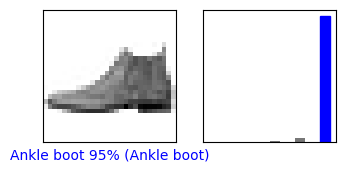

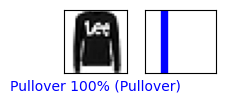

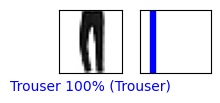

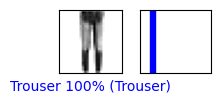

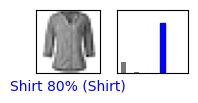

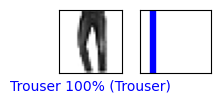

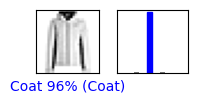

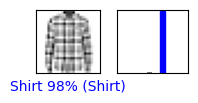

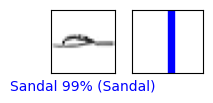

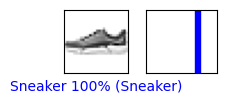

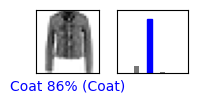

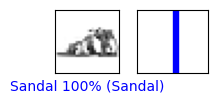

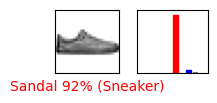

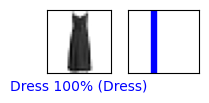

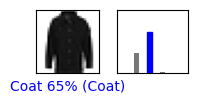

In [60]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.show()


In [61]:
# Берем одну картинку из проверочного сета.
img = test_images[0]
print(img.shape)


(28, 28)


In [62]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [63]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[3.5978419e-06 9.4765468e-08 1.2941558e-05 1.5455544e-06 1.9548866e-05
  1.2004234e-02 1.3524236e-05 3.6054350e-02 3.6528936e-04 9.5152497e-01]]


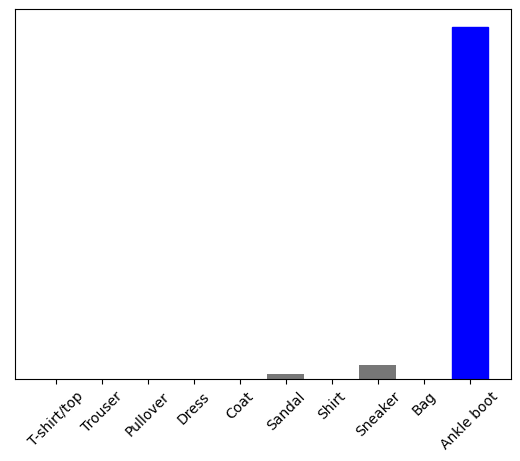

In [64]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [65]:
np.argmax(predictions_single[0])


9

In [66]:
model.save('model_baza_class.h5')

new_model = keras.models.load_model('model_baza_class.h5')
loss, acc = new_model.evaluate(test_images, test_labels)
print("Восстановленная модель, точность: {:5.2f}%".format(100*acc))


313/313 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8777
Восстановленная модель, точность: 87.77%
